INFO: Using the S3 STScI public dataset [astroquery.mast.cloud]


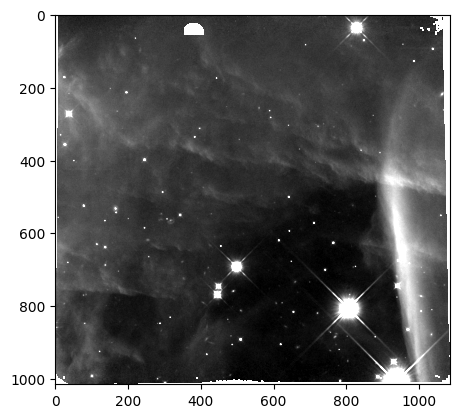

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import s3fs

from astropy.io import fits
from astroquery.mast import Observations

Observations.enable_cloud_dataset()
obs = Observations.query_criteria(obs_id="ibxl50020")

prod = Observations.get_product_list(obs)
filtered = Observations.filter_products(prod, mrp_only=True, productType='SCIENCE')

c_uri = Observations.get_cloud_uris(filtered)
c_uri = c_uri[0]

fs = s3fs.S3FileSystem(anon=True)

# Open the file in AWS: 'F' is the S3 file
with fs.open(c_uri, 'rb') as f:
    # Now actually read in the FITS file 
    with fits.open(f, 'readonly') as HDUlist:
        #HDUlist.info()
        sci = HDUlist[1].data
# Adjust limits on image: stars are bright, empty space is very dark
low = np.nanpercentile(sci, 1)
high = np.nanpercentile(sci,99)

# Plot sci in greyscale
plt.imshow(sci, cmap='gray', vmin=low, vmax=high)